In [1]:
import os
file_path = os.path.abspath("school_safety_all_finance_data.csv")
print(file_path)

C:\Users\ryanb\Semester 8\DS 490 Capstone\DS 490 Report Writing\school_safety_all_finance_data.csv


In [2]:
import os
file_path = os.path.abspath("school_safety_nces_data.csv")
print(file_path)

C:\Users\ryanb\Semester 8\DS 490 Capstone\DS 490 Report Writing\school_safety_nces_data.csv


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from mpl_toolkits.basemap import Basemap

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv(r'C:\Users\ryanb\Semester 8\DS 490 Capstone\DS 490 Report Writing\school_safety_nces_data.csv')

C:\Users\ryanb\AppData\Local\Temp\ipykernel_5716\1363179079.py:1: DtypeWarning: Columns (44,194,613,1272,1273) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\ryanb\Semester 8\DS 490 Capstone\DS 490 Report Writing\school_safety_nces_data.csv')


In [6]:
df_master = pd.read_csv(r'C:\Users\ryanb\Semester 8\DS 490 Capstone\DS 490 Report Writing\school_safety_all_finance_data.csv')

C:\Users\ryanb\AppData\Local\Temp\ipykernel_5716\1893303240.py:1: DtypeWarning: Columns (40,190,597,601,607,609,617,619,639,646) have mixed types. Specify dtype option on import or set low_memory=False.
  df_master = pd.read_csv(r'C:\Users\ryanb\Semester 8\DS 490 Capstone\DS 490 Report Writing\school_safety_all_finance_data.csv')


In [7]:
df_master['fatal_vs_wounded'] = df_master['Victims_Killed'] / df_master['Number_Victims']

In [8]:
df_master['fatal_vs_wounded'] = df_master['fatal_vs_wounded'].fillna(0) 

In [9]:
df_master['Mass'] = df_master['Number_Victims']>2
df_master['Mass'] = df_master['Mass'].astype(int)
mass_df = df_master[df_master['Mass']==1]

In [10]:
def categorize_fatality(fatality):
    if fatality <= 0.1:
        return 0
    elif fatality >= 0.25:
        return 1
    else:
        return 2

df_master['Fatality_Type(low(0)/high(1))'] = df_master['fatal_vs_wounded'].apply(lambda x: categorize_fatality(x))

In [11]:
avg_fatality_by_year = df_master.groupby('Year')['fatal_vs_wounded'].mean()

In [12]:
avg_fatality_by_year_mass = mass_df.groupby('Year')['fatal_vs_wounded'].mean()

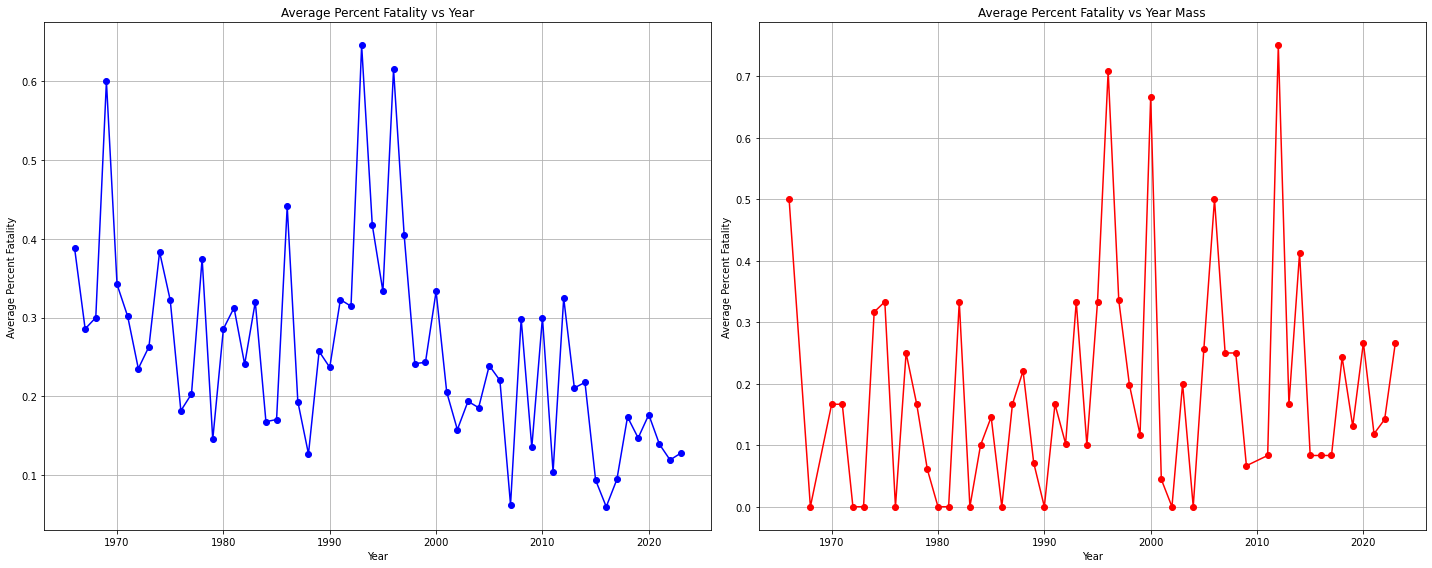

In [13]:
plt.figure(figsize=(20, 8))


plt.subplot(1, 2, 1)
plt.plot(avg_fatality_by_year.index, avg_fatality_by_year.values, marker='o', linestyle='-',color='blue')
plt.title('Average Percent Fatality vs Year')
plt.xlabel('Year')
plt.ylabel('Average Percent Fatality')
plt.grid(True)

# Mass Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(avg_fatality_by_year_mass.index, avg_fatality_by_year_mass.values, marker='o', linestyle='-',color='red')
plt.title('Average Percent Fatality vs Year Mass')
plt.xlabel('Year')
plt.ylabel('Average Percent Fatality')
plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

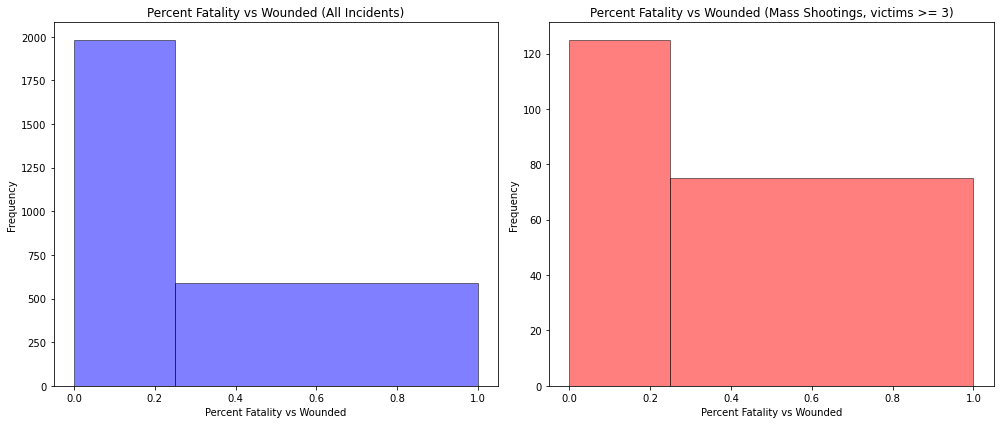

In [14]:
mass_df = df_master[df_master['Mass']==1]
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
bins2 = [0,0.25,0.25,1]

axs[0].hist(df_master['fatal_vs_wounded'], bins=bins2, color='blue', edgecolor='black', alpha=0.5)
axs[0].set_xlabel('Percent Fatality vs Wounded')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Percent Fatality vs Wounded (All Incidents)')

axs[1].hist(mass_df['fatal_vs_wounded'], bins=bins2, color='red', edgecolor='black', alpha=0.5)
axs[1].set_xlabel('Percent Fatality vs Wounded')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Percent Fatality vs Wounded (Mass Shootings, victims >= 3)')

plt.tight_layout()
plt.show()

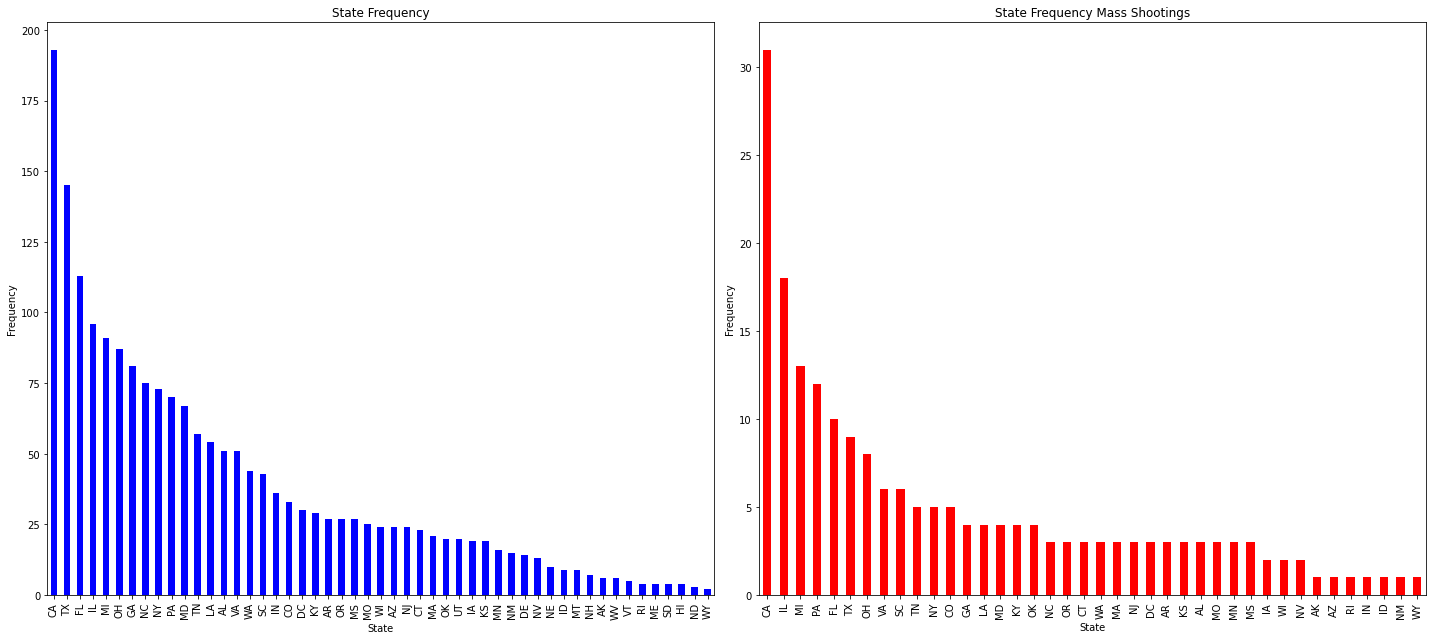

In [15]:
plt.figure(figsize=(20, 9)) 

plt.subplot(1, 2, 1)
df['State'].value_counts().plot(kind='bar',color = 'blue')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('State Frequency')

plt.subplot(1, 2, 2)
mass_df['State'].value_counts().plot(kind='bar',color = 'red')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('State Frequency Mass Shootings')

plt.tight_layout()
plt.show()

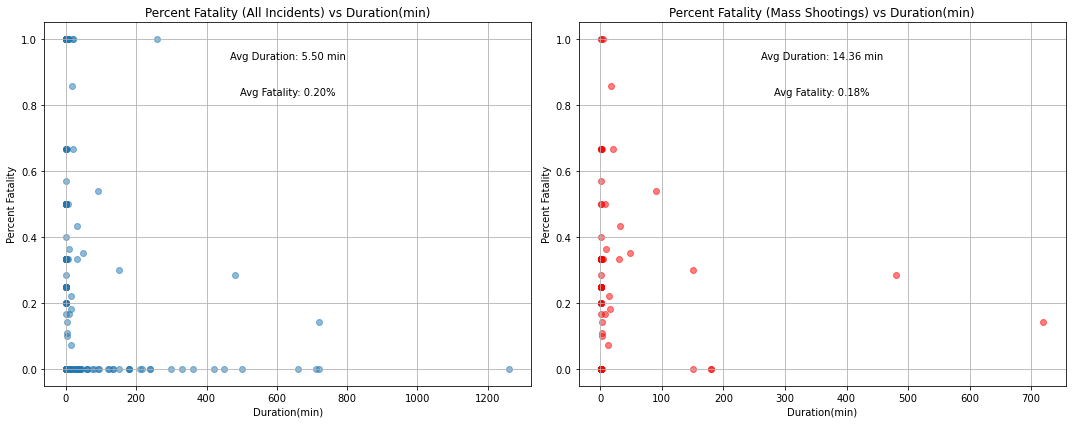

In [16]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(df_master['Duration_min'], df_master['fatal_vs_wounded'], alpha=0.5)
plt.title('Percent Fatality (All Incidents) vs Duration(min)')
plt.xlabel('Duration(min)')
plt.ylabel('Percent Fatality')
plt.grid(True)

avg_duration_all = df_master['Duration_min'].mean()
avg_fatality_all = df_master['fatal_vs_wounded'].mean()


plt.text(0.5, 0.9, f'Avg Duration: {avg_duration_all:.2f} min', transform=plt.gca().transAxes, ha='center')
plt.text(0.5, 0.8, f'Avg Fatality: {avg_fatality_all:.2f}%', transform=plt.gca().transAxes, ha='center')


plt.subplot(1, 2, 2)
plt.scatter(mass_df['Duration_min'], mass_df['fatal_vs_wounded'], alpha=0.5, color='red')
plt.title('Percent Fatality (Mass Shootings) vs Duration(min)')
plt.xlabel('Duration(min)')
plt.ylabel('Percent Fatality')
plt.grid(True)


avg_duration_mass = mass_df['Duration_min'].mean()
avg_fatality_mass = mass_df['fatal_vs_wounded'].mean()


plt.text(0.5, 0.9, f'Avg Duration: {avg_duration_mass:.2f} min', transform=plt.gca().transAxes, ha='center')
plt.text(0.5, 0.8, f'Avg Fatality: {avg_fatality_mass:.2f}%', transform=plt.gca().transAxes, ha='center')


plt.tight_layout()
plt.show()


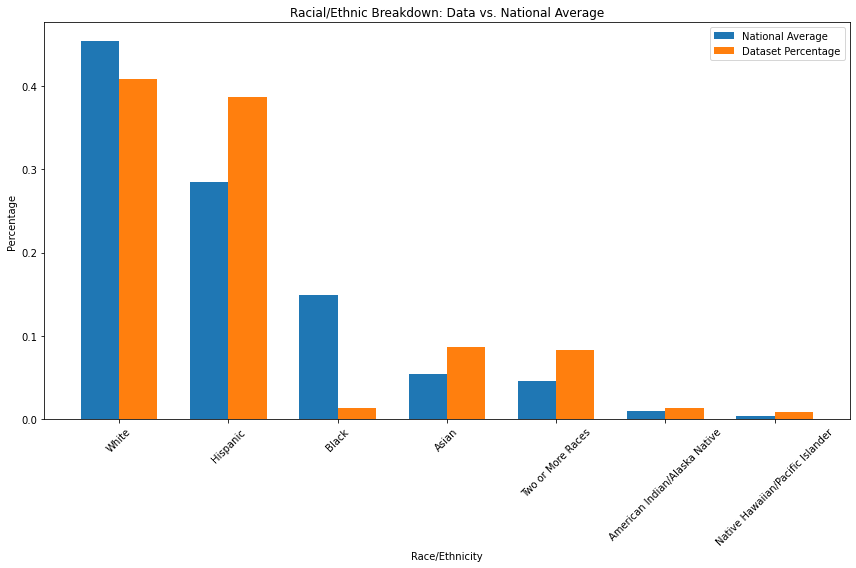

In [17]:
import matplotlib.pyplot as plt
import numpy as np

national_average = {
    'White': 0.453441,
    'Hispanic': 0.28525,
    'Black': 0.149798,
    'Asian': 0.054656,
    'Two or More Races': 0.046559,
    'American Indian/Alaska Native': 0.010121,
    'Native Hawaiian/Pacific Islander': 0.003584  
}

dataset_percentage = {
    'White': 0.408438,
    'Hispanic': 0.387144,
    'Black': 0.013259,
    'Asian': 0.086548,
    'Two or More Races': 0.082646,
    'American Indian/Alaska Native': 0.013259,
    'Native Hawaiian/Pacific Islander': 0.008706
}

plt.figure(figsize=(12, 8))

bar_width = 0.35

x = np.arange(len(national_average))

plt.bar(x - bar_width/2, national_average.values(), bar_width, label='National Average')

plt.bar(x + bar_width/2, dataset_percentage.values(), bar_width, label='Dataset Percentage')

plt.xlabel('Race/Ethnicity')
plt.ylabel('Percentage')
plt.title('Racial/Ethnic Breakdown: Data vs. National Average')
plt.xticks(x, national_average.keys(),rotation =45)
plt.legend()

plt.tight_layout()
plt.show()


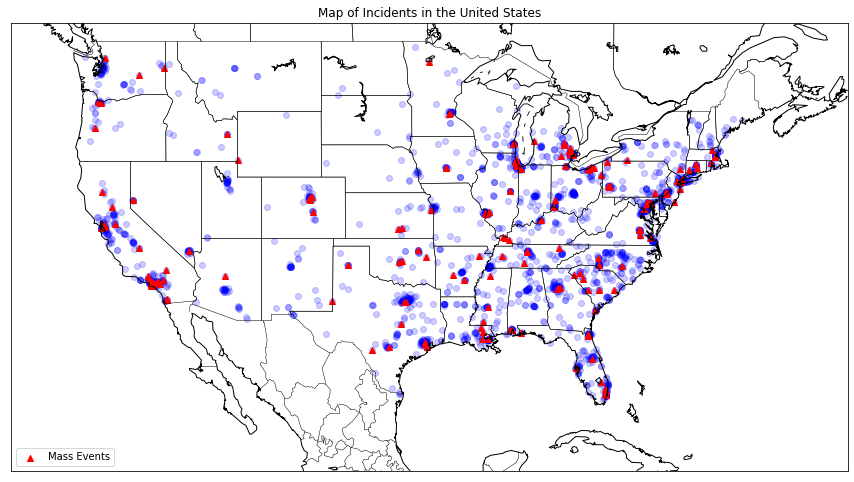

In [18]:
plt.figure(figsize=(15, 15)) 


map = Basemap(llcrnrlon=-130, llcrnrlat=20, urcrnrlon=-60, urcrnrlat=50,
              projection='merc', resolution='l', 
              lon_0=-98, lat_0=38)

map.drawcoastlines()
map.drawcountries()
map.drawstates()

x, y = map(df_master['LNG'].values, df_master['LAT'].values)

map.scatter(x, y, marker='o', color='blue', alpha=0.2)

x_mass, y_mass = map(mass_df['LNG'].values, mass_df['LAT'].values)

map.scatter(x_mass, y_mass, marker='^', color='red', alpha=1, label='Mass Events')


plt.legend(loc='lower left')

plt.title('Map of Incidents in the United States')

plt.show()

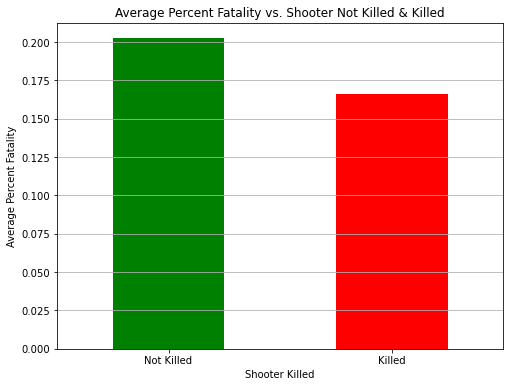

In [19]:
import matplotlib.pyplot as plt

filtered_df = df_master[df_master['Shooter_Killed'] != 2]

fatality_by_shooter_killed = filtered_df.groupby('Shooter_Killed')['fatal_vs_wounded'].mean()

plt.figure(figsize=(8, 6))
fatality_by_shooter_killed.plot(kind='bar', color=['green', 'red'])

plt.xlabel('Shooter Killed')
plt.ylabel('Average Percent Fatality')
plt.title('Average Percent Fatality vs. Shooter Not Killed & Killed')
plt.xticks([0, 1], ['Not Killed', 'Killed'], rotation=0)

plt.grid(axis='y')
plt.show()

In [20]:
df_accidental = df_master[df_master['Situation']=='Accidental']
df_master['Accidental_Flag'] = (df_master['Situation'] == 'Accidental').astype(int)
df_master['Accomplice'] = df_master['Accomplice'].replace({'Yes': 1, 'No': 0,'Unknown':2})
df_master['Bullied'] = df_master['Bullied'].replace({'Yes': 1, 'No': 0,'N':0})
df_master['Gang_Related'] = df_master['Gang_Related'].replace({'Yes': 1, 'No': 0,'Unknown':2})
df_master['Domestic_Violence'] = df_master['Domestic_Violence'].replace({'Yes': 1, 'No': 0,'Unknown':2,'NO':0})

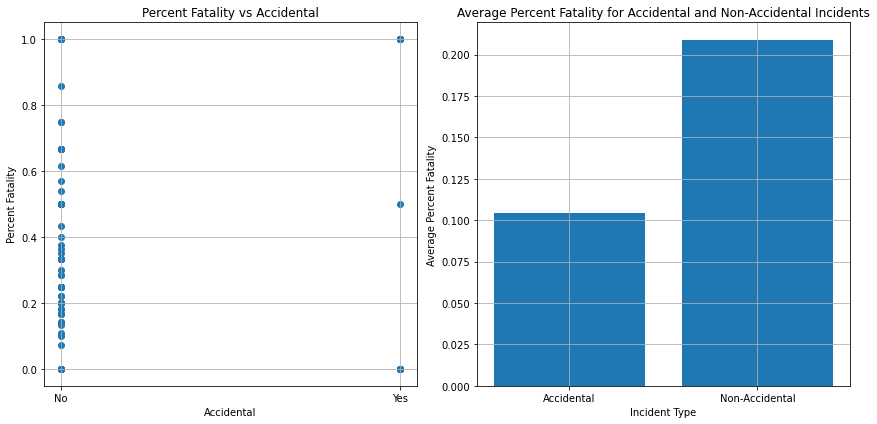

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(df_master['Accidental_Flag'], df_master['fatal_vs_wounded'])
axs[0].set_xlabel('Accidental')
axs[0].set_ylabel('Percent Fatality')
axs[0].set_title('Percent Fatality vs Accidental')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['No', 'Yes'])
axs[0].grid(True)

avg_fatal_accidental = df_master[df_master['Accidental_Flag'] == 1]['fatal_vs_wounded'].mean()
avg_fatal_non_accidental = df_master[df_master['Accidental_Flag'] == 0]['fatal_vs_wounded'].mean()

axs[1].bar(['Accidental', 'Non-Accidental'], [avg_fatal_accidental, avg_fatal_non_accidental])
axs[1].set_xlabel('Incident Type')
axs[1].set_ylabel('Average Percent Fatality')
axs[1].set_title('Average Percent Fatality for Accidental and Non-Accidental Incidents')
axs[1].grid(True)

plt.tight_layout()
plt.show()

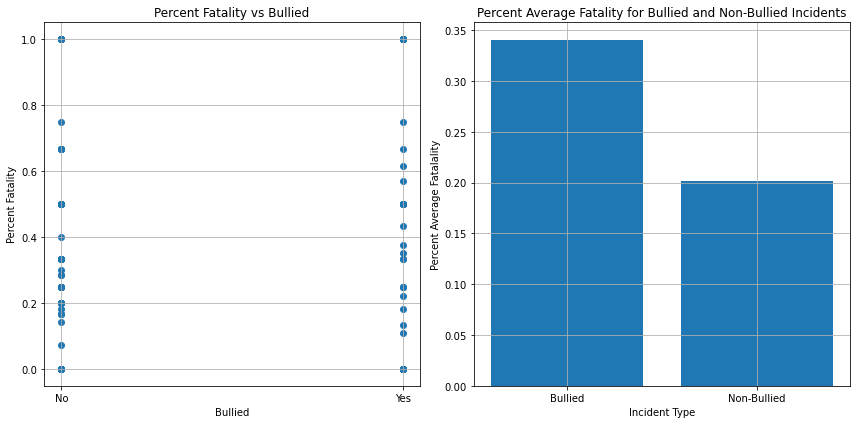

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(df_master['Bullied'], df_master['fatal_vs_wounded'])
axs[0].set_xlabel('Bullied')
axs[0].set_ylabel('Percent Fatality')
axs[0].set_title('Percent Fatality vs Bullied')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['No', 'Yes'])
axs[0].grid(True)

avg_fatal_Bullied = df_master[df_master['Bullied'] == 1]['fatal_vs_wounded'].mean()
avg_fatal_non_Bullied = df_master[df_master['Bullied'] == 0]['fatal_vs_wounded'].mean()

axs[1].bar(['Bullied', 'Non-Bullied'], [avg_fatal_Bullied, avg_fatal_non_Bullied])
axs[1].set_xlabel('Incident Type')
axs[1].set_ylabel('Percent Average Fatalality')
axs[1].set_title('Percent Average Fatality for Bullied and Non-Bullied Incidents')
axs[1].grid(True)

plt.tight_layout()
plt.show()

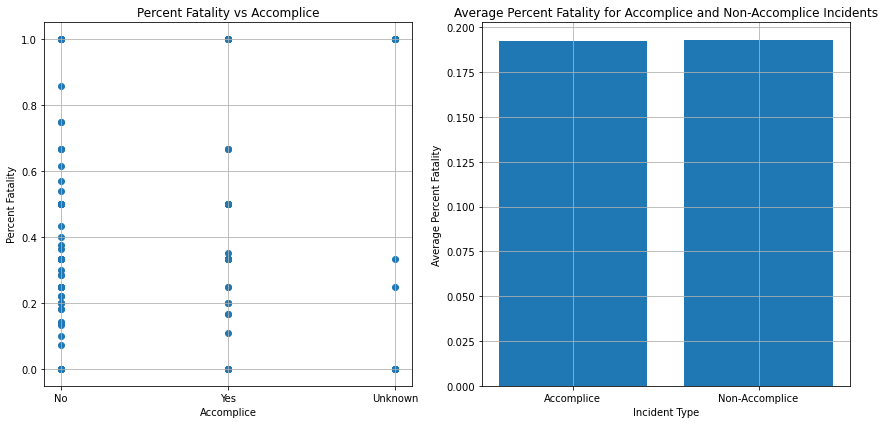

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(df_master['Accomplice'], df_master['fatal_vs_wounded'])
axs[0].set_xlabel('Accomplice')
axs[0].set_ylabel('Percent Fatality')
axs[0].set_title('Percent Fatality vs Accomplice')
axs[0].set_xticks([0, 1, 2])
axs[0].set_xticklabels(['No', 'Yes', 'Unknown'])
axs[0].grid(True)

avg_fatal_Accomplice = df_master[df_master['Accomplice'] == 1]['fatal_vs_wounded'].mean()
avg_fatal_non_Accomplice = df_master[df_master['Accomplice'] == 0]['fatal_vs_wounded'].mean()

axs[1].bar(['Accomplice', 'Non-Accomplice'], [avg_fatal_Accomplice, avg_fatal_non_Accomplice])
axs[1].set_xlabel('Incident Type')
axs[1].set_ylabel('Average Percent Fatality')
axs[1].set_title('Average Percent Fatality for Accomplice and Non-Accomplice Incidents')
axs[1].grid(True)

plt.tight_layout()
plt.show()

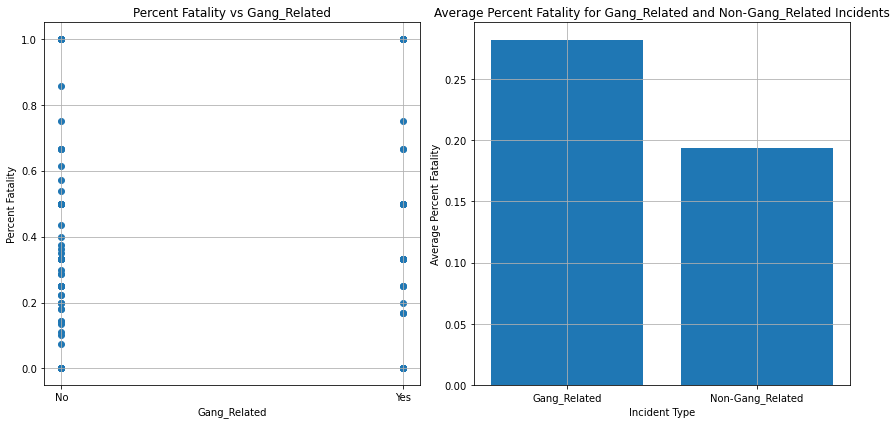

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(df_master['Gang_Related'], df_master['fatal_vs_wounded'])
axs[0].set_xlabel('Gang_Related')
axs[0].set_ylabel('Percent Fatality')
axs[0].set_title('Percent Fatality vs Gang_Related')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['No', 'Yes'])
axs[0].grid(True)

avg_fatal_Gang_Related = df_master[df_master['Gang_Related'] == 1]['fatal_vs_wounded'].mean()
avg_fatal_non_Gang_Related = df_master[df_master['Gang_Related'] == 0]['fatal_vs_wounded'].mean()

axs[1].bar(['Gang_Related', 'Non-Gang_Related'], [avg_fatal_Gang_Related, avg_fatal_non_Gang_Related])
axs[1].set_xlabel('Incident Type')
axs[1].set_ylabel('Average Percent Fatality')
axs[1].set_title('Average Percent Fatality for Gang_Related and Non-Gang_Related Incidents')
axs[1].grid(True)

plt.tight_layout()
plt.show()

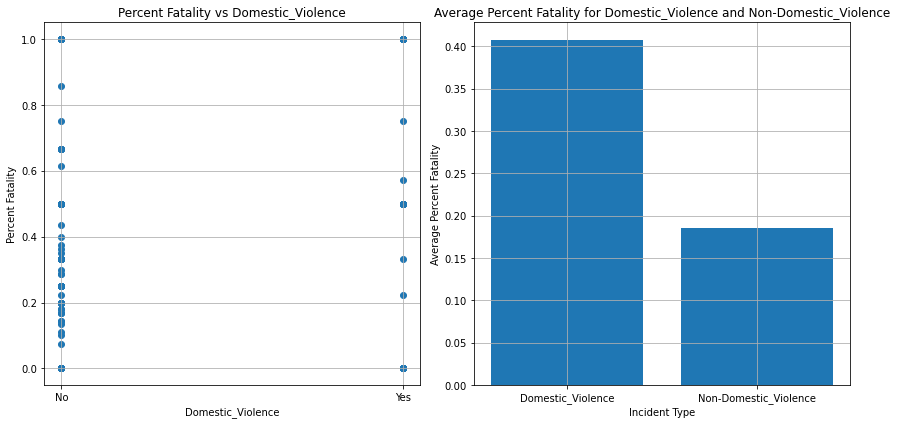

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].scatter(df_master['Domestic_Violence'], df_master['fatal_vs_wounded'])
axs[0].set_xlabel('Domestic_Violence')
axs[0].set_ylabel('Percent Fatality')
axs[0].set_title('Percent Fatality vs Domestic_Violence')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['No', 'Yes'])
axs[0].grid(True)

avg_fatal_Domestic_Violence = df_master[df_master['Domestic_Violence'] == 1]['fatal_vs_wounded'].mean()
avg_fatal_non_Domestic_Violence = df_master[df_master['Domestic_Violence'] == 0]['fatal_vs_wounded'].mean()

axs[1].bar(['Domestic_Violence', 'Non-Domestic_Violence'], [avg_fatal_Domestic_Violence, avg_fatal_non_Domestic_Violence])
axs[1].set_xlabel('Incident Type')
axs[1].set_ylabel('Average Percent Fatality')
axs[1].set_title('Average Percent Fatality for Domestic_Violence and Non-Domestic_Violence')
axs[1].grid(True)

plt.tight_layout()

In [26]:
df_master

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0    Incident_ID  Month  Day  Year  \
0                0             0           0  20231103INKII     11    3  2023   
1                1             1           1  20231102NCFRM     11    2  2023   
2                2             2           2  20231102OHWAL     11    2  2023   
3                3             3           3  20231030NCRAR     10   30  2023   
4                4             4           4  20231027TXDUS     10   27  2023   
...            ...           ...         ...            ...    ...  ...   ...   
2567          2567          2567        2567  19660427NYBAB      4   27  1966   
2568          2568          2568        2568  19660328CAJOL      3   28  1966   
2569          2569          2569        2569  19660324CACAM      3   24  1966   
2570          2570          2570        2570  19660314TXCAW      3   14  1966   
2571          2571          2571        2571  19660311NCIRC      3   11  1966   

            Date                            School  Victims_Killed  \
0      11/3/2023      Kipp Indy Legacy High School               1   
1      11/2/2023               Freedom High School               0   
2      11/2/2023      Washington Elementary School               0   
3     10/30/2023                Raleigh School Bus               0   
4     10/27/2023       Dub Farris Athletic Complex               0   
...          ...                               ...             ...   
2567   4/27/1966             Bay Shore High School               1   
2568   3/28/1966                Jordan High School               0   
2569   3/24/1966    Camino Pablo Elementary School               3   
2570   3/14/1966                Carver High School               1   
2571   3/11/1966  Irwing Avenue Junior High School               0   

      Victims_Wounded  Number_Victims  Shooter_Killed  \
0                   0               1               0   
1                   0               0               0   
2                   0               0               0   
3                   2               2               0   
4                   1               1               0   
...               ...             ...             ...   
2567                0               1               0   
2568                1               1               0   
2569                0               3               1   
2570                0               1               0   
2571                1               1               0   

                                                 Source  Number_News  \
0     https://www.wrtv.com/news/local-news/crime/1-c...          5.0   
1     https://morganton.com/news/local/crime-courts/...          1.0   
2     https://fox8.com/news/suspect-arrested-after-s...          5.0   
3     https://abc11.com/raleigh-school-van-shot-stud...          1.0   
4     https://www.ksat.com/news/local/2023/10/28/pol...          2.0   
...                                                 ...          ...   
2567  https://www.nytimes.com/1966/04/28/archives/li...          NaN   
2568  https://www.newspapers.com/image/564577824/?te...          NaN   
2569  https://www.newspapers.com/image/17958969/?ter...          NaN   
2570  https://www.newspapers.com/image/43852213/?ter...          NaN   
2571  https://www.newspapers.com/image/621110015/?te...          NaN   

     Media_Attention  Reliability Quarter          City State School_Level  \
0              Local            4    Fall  Indianapolis    IN         High   
1              Local            4    Fall     Morganton    NC         High   
2              Local            4    Fall        Lorain    OH   Elementary   
3              Local            4    Fall       Raleigh    NC         High   
4           Regional            4    Fall   San Antonio    TX         High   
...              ...          ...     ...           ...   ...          ...   
2567        Regional            4  Spring     Bay Shore    NY         High   
2568        Nation